# Model Development & Evaluation

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

Please see the link to know more about the dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [2]:
df = pd.read_csv('Preprocessed_Life_Expectancy_Data.csv')
df = df. drop('Unnamed: 0', axis=1)
df = df. drop('year', axis=1)
df.head()

,country,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,0,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Split Input and Traget Variables

In [3]:
X = df.drop('life_expectancy', axis = 1) 
y = df['life_expectancy']

In [4]:
X.columns

Index(['country', 'status', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (2928, 21)
Shape of training dataset: (2049, 20)
Shape of testing dataset: (879, 20)


## Model Selection

In [6]:
#!pip install lazypredict

from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = reg.fit(X_train, X_test, y_train, y_test)
model

C:\Users\sumai\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 98%|█████████▊| 42/43 [00:09<00:00,  4.15it/s]

[21:46:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 43/43 [00:09<00:00,  4.54it/s]


,R-Squared,RMSE,Time Taken
Model,,,
ExtraTreesRegressor,0.97,1.80,0.86
LGBMRegressor,0.96,1.88,0.22
HistGradientBoostingRegressor,0.96,1.91,1.47
RandomForestRegressor,0.96,1.95,1.58
BaggingRegressor,0.95,2.12,0.17
GradientBoostingRegressor,0.95,2.23,0.62
XGBRegressor,0.95,2.26,0.15
DecisionTreeRegressor,0.91,2.86,0.04
KNeighborsRegressor,0.91,2.97,0.10


### Model Building: ExtraTree Regressor

In [7]:
from sklearn import ensemble
from sklearn import model_selection
from pprint import pprint

ex = ensemble.ExtraTreesRegressor(random_state = 25)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ex.get_params())

Parameters currently in use:

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}


### Random Hyperparameter Grid

In [8]:
import numpy as np
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'min_samples_split': [1, 2, 5, 10, 14],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


### Random Search Training

In [9]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
extra_random = RandomizedSearchCV(estimator = ex, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 5, verbose = 2, random_state = 25, n_jobs = 1)

#### How much time it may take?

In [10]:
def timer(start_time = None):
    
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

### Fit the model

In [11]:
#from datetime import datetime

#start_time = timer(None) # timing starts from this point for "start_time" variable
#extra_random.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable

In [12]:
#pprint (extra_random.best_params_)
#print ('Negative mean squared error is:',extra_random.best_score_)

In [13]:
tuned_extra = ensemble.ExtraTreesRegressor(bootstrap = False, max_depth = 890, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1400)
tuned_extra.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=890, min_samples_split=5, n_estimators=1400)

# Model Evaluation

### Let's compute the accuracy of the model based on the actual target test data and the predicted result.

In [14]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

base_model = ensemble.ExtraTreesRegressor(random_state = 25)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1.0727 degrees.
Accuracy = 98.348%.


In [15]:
randomized_accuracy = evaluate(tuned_extra, X_test, y_test)

Model Performance
Average Error: 1.0827 degrees.
Accuracy = 98.333%.


In [16]:
print('Improvement of {:0.3f}%.'.format( 100 * (randomized_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.014%.


#### Let's look at the important performace metrics--

### Tuned ExtraTrees Model

In [17]:
y_pred = tuned_extra.predict(X_test)

from sklearn import metrics

rsquared = round(metrics.r2_score(y_test, y_pred), 4)
adjusted_r_squared = round(1 - (1-rsquared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
print('Mean absolute error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred), 4)))
print('Mean squared error: {}'.format(round(metrics.mean_squared_error(y_test, y_pred),4)))
print('Root mean squared error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4)))
print('R Squared value: {}'.format(rsquared))
print('Adjusted R Squared Value: {}'.format(adjusted_r_squared))

Mean absolute error: 1.0827
Mean squared error: 3.3431
Root mean squared error: 1.8284
R Squared value: 0.9642
Adjusted R Squared Value: 0.9634


### Base Model

In [18]:
y_hat = base_model.predict(X_test)

from sklearn import metrics

rsquared = round(metrics.r2_score(y_test, y_hat), 4)
adjusted_r_squared = round(1 - (1-rsquared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)
print('Mean absolute error: {}'.format(round(metrics.mean_absolute_error(y_test, y_hat), 4)))
print('Mean squared error: {}'.format(round(metrics.mean_squared_error(y_test, y_hat),4)))
print('Root mean squared error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_hat)), 4)))
print('R Squared value: {}'.format(rsquared))
print('Adjusted R Squared Value: {}'.format(adjusted_r_squared))

Mean absolute error: 1.0727
Mean squared error: 3.2753
Root mean squared error: 1.8098
R Squared value: 0.9649
Adjusted R Squared Value: 0.9641


#### The error terms are small and the base model can explain variability quite well. So, we can say the model generalizes well. :)

##### Should we look at the distribution plot of the actual and predicted values of the target variable?

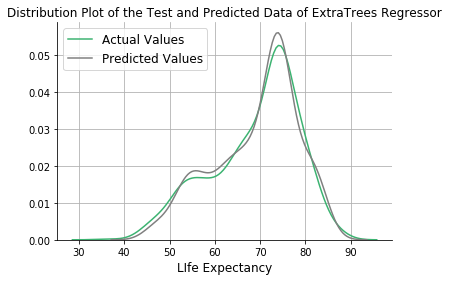

In [19]:
def DistributionPlot(test, predicted, testName, predName, model):
    width = 6
    height = 4
    plt.figure(figsize= (width, height))

    ax1 = sns.distplot(test, hist = False, color = "mediumseagreen", label = testName)
    ax2 = sns.distplot(predicted, hist = False, color = "gray", label = predName, ax = ax1)

    plt.title('Distribution Plot of the Test and Predicted Data of {}'.format(model), fontsize= 'large')
    plt.xlabel('LIfe Expectancy', fontsize= 'large')
    plt.legend(fontsize= 'large')
    plt.grid(None)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

DistributionPlot(y_test, y_hat, "Actual Values", "Predicted Values", 'ExtraTrees Regressor')

#### What the residuals look like?

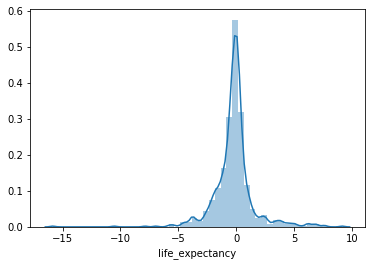

In [20]:
sns.distplot(y_test - y_hat)

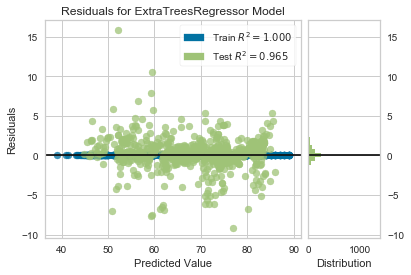

In [21]:
#!pip install yellowbrick
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

width = 6
height = 4
plt.figure(figsize= (width, height))

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(base_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#### Not too bad! The dots are pretty close except for some.

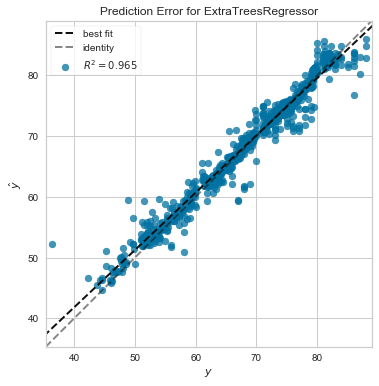

In [22]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import prediction_error

width = 6
height = 6
plt.figure(figsize= (width, height))

# Instantiate the linear model and visualizer
visualizer = prediction_error(base_model, X_train, y_train, X_test, y_test)

### Let's fit the whole data now Predict result from user input.

In [23]:
base_model.fit(X, y)

ExtraTreesRegressor(random_state=25)

In [24]:
import pickle 
# open a file, where you ant to store the data
file = open('ExtraTrees_Life_Expectancy.pkl', 'wb')

# dump information to that file
pickle.dump(base_model, file)